# Importing Libraries

Importing necessary libraries for image processing, data handling, and model building.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.models import Model

2024-07-02 00:26:33.899889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 00:26:33.899987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 00:26:34.039052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Setting Paths

Setting the paths to the training and test data directories.

In [ ]:
trainpath = '/kaggle/input/riceleafdiseasedataset/dataset/train'
testpath = '/kaggle/input/riceleafdiseasedataset/dataset/test'

# Image Processing - Training Data

Loading and preprocessing training images from the specified directory, including resizing and label encoding.

In [ ]:
# Define the new size for resizing images
new_size = 224

# Initialize lists to store images and labels
train_images = []
train_labels = []

# Dictionary mapping class names to numeric labels
class_disease = {'BacterialBlight': 0, 'Blast': 1, 'BrownSpot': 2, 'Tungro': 3}

# Iterate through each subdirectory in the trainpath directory
for i in os.listdir(trainpath):
    # Check if the subdirectory is a disease class
    if i in class_disease:
        print("Entering the folder:", i)

        # Get all image files (.jpg and .JPG) in the current subdirectory
        files = gb.glob(pathname=str(trainpath + '/' + i + '/*.jpg')) + gb.glob(pathname=str(trainpath + '/' + i + '/*.JPG'))
        print("Number of images in the folder:", len(files))

        # Process each image in the subdirectory
        for j in files:
            # Read and preprocess the image
            image_raw = cv2.imread(j)  # Read image in BGR format
            image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            resize_image = cv2.resize(image, (new_size, new_size))  # Resize image to new_size x new_size

            # Append resized image to train_images list
            train_images.append(list(resize_image))  # Convert ndarray to list and append

            # Append corresponding label to train_labels list
            train_labels.append(class_disease[i])  # Append label based on class_disease dictionary


Entering the folder: Tungro
Number of images in the folder: 1108
Entering the folder: BacterialBlight
Number of images in the folder: 1384
Entering the folder: Blast
Number of images in the folder: 1240
Entering the folder: BrownSpot
Number of images in the folder: 1400


# Visualizing Training Data

Displaying a sample of training images with labels.

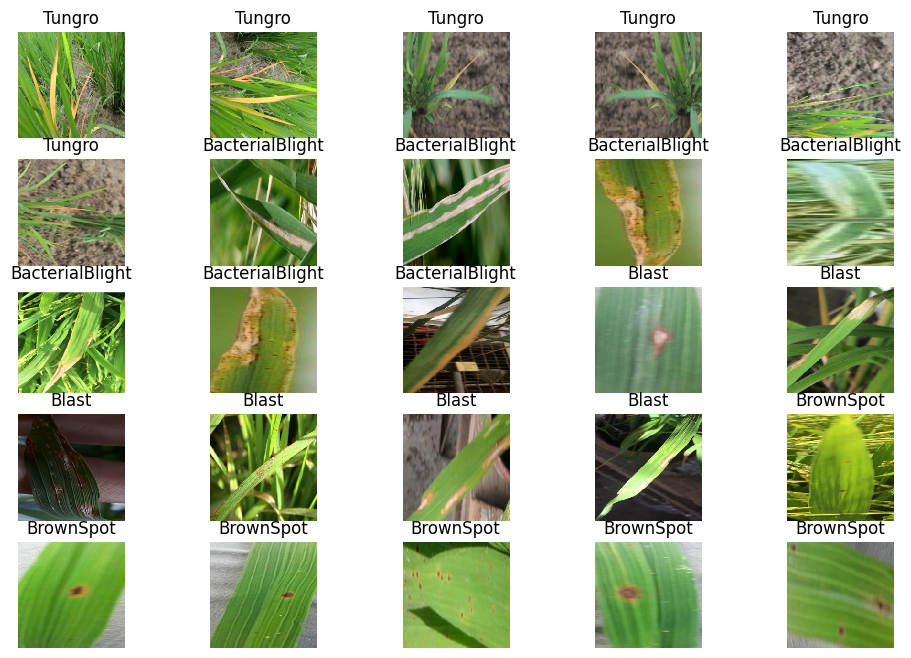

In [ ]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

# Plot every 100th image in the grid of 5x5 (25 images)
for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    index = (i - 1) * 200  # Calculate the index for every 100th image
    if train_labels[index] == 0:
        ax.title.set_text('BacterialBlight')
    elif train_labels[index] == 1:
        ax.title.set_text('Blast')
    elif train_labels[index] == 2:
        ax.title.set_text('BrownSpot')
    elif train_labels[index] == 3:
        ax.title.set_text('Tungro')
    plt.imshow(train_images[index], interpolation='nearest')
    plt.axis('off')  # Hide axes for better visualization

plt.show()

# Image Processing - Test Data

Loading and preprocessing test images from the specified directory, including resizing and label encoding.

In [ ]:
new_size = 224
test_images = []
test_labels = []

for i in os.listdir(testpath):  # Entering the test folder
  if i in class_disease:
    print("Entering to the folder name:", i)
    files = gb.glob(pathname=str(testpath + '/' + i + '/*.jpg')) +  gb.glob(pathname=str(testpath + '/' + i + '/*.JPG')) # Pointing to all the .jpg extension image folder
    print("Number of images in the folder is", len(files))
    for j in files:
        image_raw = cv2.imread(j)
        image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image, (new_size, new_size))
        test_images.append(list(resize_image))
        test_labels.append(class_disease[i])


Entering to the folder name: Tungro
Number of images in the folder is 200
Entering to the folder name: BacterialBlight
Number of images in the folder is 200
Entering to the folder name: Blast
Number of images in the folder is 200
Entering to the folder name: BrownSpot
Number of images in the folder is 200


# Visualizing Test Data

Displaying a sample of test images with labels.

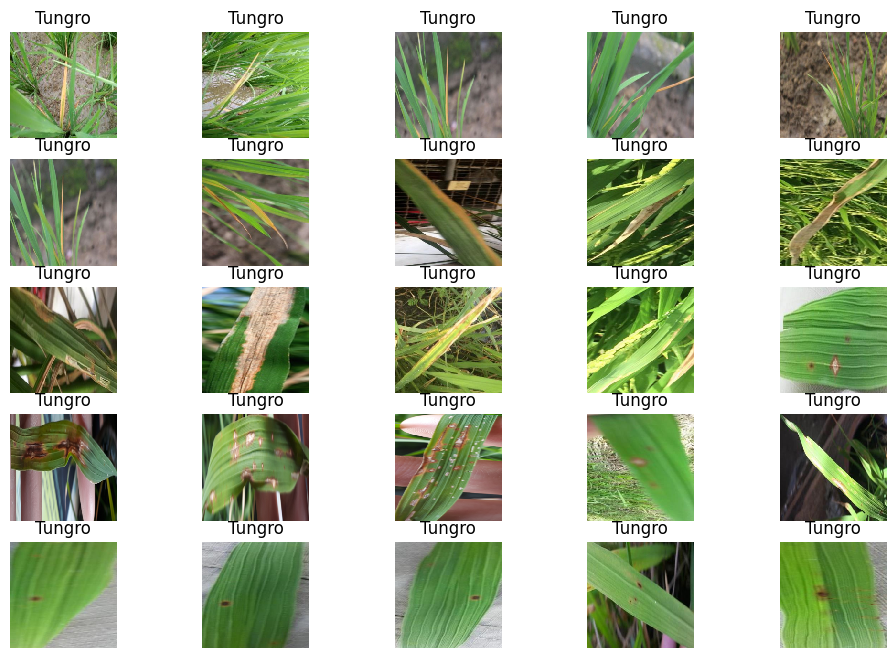

In [ ]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 5

# Plot every 100th image in the grid of 5x5 (25 images)
for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    index = (i - 1) * 30  # Calculate the index for every 100th image
    if train_labels[index] == 0:
        ax.title.set_text('BacterialBlight')
    elif train_labels[index] == 1:
        ax.title.set_text('Blast')
    elif train_labels[index] == 2:
        ax.title.set_text('BrownSpot')
    elif train_labels[index] == 3:
        ax.title.set_text('Tungro')
    plt.imshow(test_images[index], interpolation='nearest')
    plt.axis('off')  # Hide axes for better visualization

plt.show()

# Converting Lists to Arrays

Converting image and label lists to numpy arrays for use in model training.

In [ ]:
def list_to_array_train(train_images, train_labels):
    return np.array(train_images), np.array(train_labels)

X_train, y_train = list_to_array_train(train_images, train_labels)

def list_to_array_test(test_images, test_labels):
    return np.array(test_images), np.array(test_labels)

X_test, y_test = list_to_array_test(test_images, test_labels)

print(X_train.shape)
print("*" * 20)
print(y_train.shape)
print("*" * 20)
print(X_test.shape)
print(y_test.shape)

(5132, 224, 224, 3)
********************
(5132,)
********************
(800, 224, 224, 3)
(800,)


# One-Hot Encoding

One-hot encoding the labels for compatibility with the neural network.

In [ ]:
def keras_to_categorical(y_train, y_test):
    return to_categorical(y_train), to_categorical(y_test)

y_train1 = y_train
y_test1 = y_test
y_train, y_test = keras_to_categorical(y_train, y_test)

y_train1.shape, y_test1.shape

((5132,), (800,))

# VGG16 Transfer Learning

Defining, compiling, and training a VGG16 model for image classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np

# Ensure you're using GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Num GPUs Available: {len(gpus)}")

if len(gpus) < 2:
    print("Not enough GPUs available, ensure your environment is configured correctly")
else:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # Define the model using transfer learning with VGG16
    def model_vgg16():
        VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in VGG_model.layers:
            layer.trainable = False
        feature = GlobalAveragePooling2D()(VGG_model.output)
        d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
        d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
        output = Model(inputs=VGG_model.input, outputs=d2)
        return output

    # Strategy for multi-GPU
    strategy = tf.distribute.MirroredStrategy()

    # Function to train and evaluate the model
    def train_and_evaluate_model(X_train, y_train, X_test, y_test):
        with strategy.scope():
            model = model_vgg16()
            model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_test, axis=1)

            accuracy = accuracy_score(y_true, y_pred_classes)
            recall = recall_score(y_true, y_pred_classes, average='macro')
            precision = precision_score(y_true, y_pred_classes, average='macro')
            f1 = f1_score(y_true, y_pred_classes, average='macro')
            auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

            return accuracy, recall, precision, f1, auc

    # Perform multiple runs and store the results
    num_runs = 10
    results = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

    for i in range(num_runs):
        accuracy, recall, precision, f1, auc = train_and_evaluate_model(X_train, y_train, X_test, y_test)
        results['accuracy'].append(accuracy)
        results['recall'].append(recall)
        results['precision'].append(precision)
        results['f1'].append(f1)
        results['auc'].append(auc)
        print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

    # Compute average and standard deviation for each metric
    average_metrics = {metric: np.mean(values) for metric, values in results.items()}
    std_metrics = {metric: np.std(values) for metric, values in results.items()}

    print("\nAverage Metrics:")
    for metric, value in average_metrics.items():
        print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics[metric]:.8f})")


Num GPUs Available: 2
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.7720 - loss: 0.8834 - val_accuracy: 0.9725 - val_loss: 0.0949
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9730 - loss: 0.0776 - val_accuracy: 0.9900 - val_loss: 0.0263
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9887 - loss: 0.0282 - val_accuracy: 0.9975 - val_loss: 0.0105
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.9974 - loss: 0.0118 - val_accuracy: 0.9975 - val_loss: 0.0111
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9964 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accu

# VGG19 Transfer learning

Defining, compiling, and training a VGG19 model for image classification.

In [ ]:
# Ensure you're using GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Num GPUs Available: {len(gpus)}")

if len(gpus) < 2:
    print("Not enough GPUs available, ensure your environment is configured correctly")
else:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # Define the model using transfer learning with VGG19
    def model_vgg19():
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in base_model.layers:
            layer.trainable = False
        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(256, activation='relu')(x)
        predictions = Dense(4, activation='softmax')(x)
        model = Model(inputs=base_model.input, outputs=predictions)
        return model

    # Strategy for multi-GPU
    strategy = tf.distribute.MirroredStrategy()

    # Function to train and evaluate the model
    def train_and_evaluate_model_vgg19(X_train, y_train, X_test, y_test):
        with strategy.scope():
            model = model_vgg19()
            model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_test, axis=1)

            accuracy = accuracy_score(y_true, y_pred_classes)
            recall = recall_score(y_true, y_pred_classes, average='macro')
            precision = precision_score(y_true, y_pred_classes, average='macro')
            f1 = f1_score(y_true, y_pred_classes, average='macro')
            auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

            return accuracy, recall, precision, f1, auc

    # Perform multiple runs and store the results
    num_runs = 10
    results_vgg19 = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

    for i in range(num_runs):
        accuracy, recall, precision, f1, auc = train_and_evaluate_model_vgg19(X_train, y_train, X_test, y_test)
        results_vgg19['accuracy'].append(accuracy)
        results_vgg19['recall'].append(recall)
        results_vgg19['precision'].append(precision)
        results_vgg19['f1'].append(f1)
        results_vgg19['auc'].append(auc)
        print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

    # Compute average and standard deviation for each metric
    average_metrics_vgg19 = {metric: np.mean(values) for metric, values in results_vgg19.items()}
    std_metrics_vgg19 = {metric: np.std(values) for metric, values in results_vgg19.items()}

    print("\nAverage Metrics:")
    for metric, value in average_metrics_vgg19.items():
        print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics_vgg19[metric]:.8f})")


Num GPUs Available: 2
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.7649 - loss: 1.0852 - val_accuracy: 0.9600 - val_loss: 0.0889
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9762 - loss: 0.0750 - val_accuracy: 0.9950 - val_loss: 0.0191
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9951 - loss: 0.0260 - val_accuracy: 0.9900 - val_loss: 0.0242
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.9992 - loss: 0.0094 - val_accuracy: 0.9950 - val_loss: 0.0101
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/10

# ResNet50 Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50
# Ensure you're using GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Num GPUs Available: {len(gpus)}")

if len(gpus) < 2:
    print("Not enough GPUs available, ensure your environment is configured correctly")
else:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # Define the model using transfer learning with ResNet50
    def model_resnet50():
        ResNet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in ResNet_model.layers:
            layer.trainable = False
        feature = GlobalAveragePooling2D()(ResNet_model.output)
        d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
        d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
        output = Model(inputs=ResNet_model.input, outputs=d2)
        return output

    # Strategy for multi-GPU
    strategy = tf.distribute.MirroredStrategy()

    # Function to train and evaluate the model
    def train_and_evaluate_model_resnet50(X_train, y_train, X_test, y_test):
        with strategy.scope():
            model = model_resnet50()
            model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_test, axis=1)

            accuracy = accuracy_score(y_true, y_pred_classes)
            recall = recall_score(y_true, y_pred_classes, average='macro')
            precision = precision_score(y_true, y_pred_classes, average='macro')
            f1 = f1_score(y_true, y_pred_classes, average='macro')
            auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

            return accuracy, recall, precision, f1, auc

    # Perform multiple runs and store the results
    num_runs = 10
    results_resnet50 = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

    for i in range(num_runs):
        accuracy, recall, precision, f1, auc = train_and_evaluate_model_resnet50(X_train, y_train, X_test, y_test)
        results_resnet50['accuracy'].append(accuracy)
        results_resnet50['recall'].append(recall)
        results_resnet50['precision'].append(precision)
        results_resnet50['f1'].append(f1)
        results_resnet50['auc'].append(auc)
        print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

    # Compute average and standard deviation for each metric
    average_metrics_resnet50 = {metric: np.mean(values) for metric, values in results_resnet50.items()}
    std_metrics_resnet50 = {metric: np.std(values) for metric, values in results_resnet50.items()}

    print("\nAverage Metrics for ResNet50:")
    for metric, value in average_metrics_resnet50.items():
        print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics_resnet50[metric]:.8f})")


Num GPUs Available: 2
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 113ms/step - accuracy: 0.8254 - loss: 0.4958 - val_accuracy: 0.9625 - val_loss: 0.0782
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9887 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9958 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9992 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 1.0000 - loss: 6.3611e-04 - val_accuracy: 0.9950 - val_loss: 0.0142
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accurac

# EfficientNetB3 Transfer Learning

In [ ]:
# Ensure you're using GPU
# gpus = tf.config.list_physical_devices('GPU')
# print(f"Num GPUs Available: {len(gpus)}")

# if len(gpus) < 2:
#     print("Not enough GPUs available, ensure your environment is configured correctly")
# else:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow.keras.applications import EfficientNetB3

# Define the model using transfer learning with EfficientNetB3
def model_efficientnetb3():
    EfficientNet_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in EfficientNet_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(EfficientNet_model.output)
    d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
    output = Model(inputs=EfficientNet_model.input, outputs=d2)
    return output

# Strategy for multi-GPU
strategy = tf.distribute.MirroredStrategy()

# Function to train and evaluate the model
def train_and_evaluate_model_efficientnetb3(X_train, y_train, X_test, y_test):
    with strategy.scope():
        model = model_efficientnetb3()
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        accuracy = accuracy_score(y_true, y_pred_classes)
        recall = recall_score(y_true, y_pred_classes, average='macro')
        precision = precision_score(y_true, y_pred_classes, average='macro')
        f1 = f1_score(y_true, y_pred_classes, average='macro')
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

        return accuracy, recall, precision, f1, auc

# Perform multiple runs and store the results
num_runs = 10
results_efficientnetb3 = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

for i in range(num_runs):
    accuracy, recall, precision, f1, auc = train_and_evaluate_model_efficientnetb3(X_train, y_train, X_test, y_test)
    results_efficientnetb3['accuracy'].append(accuracy)
    results_efficientnetb3['recall'].append(recall)
    results_efficientnetb3['precision'].append(precision)
    results_efficientnetb3['f1'].append(f1)
    results_efficientnetb3['auc'].append(auc)
    print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

# Compute average and standard deviation for each metric
average_metrics_efficientnetb3 = {metric: np.mean(values) for metric, values in results_efficientnetb3.items()}
std_metrics_efficientnetb3 = {metric: np.std(values) for metric, values in results_efficientnetb3.items()}

print("\nAverage Metrics for EfficientNetB3:")
for metric, value in average_metrics_efficientnetb3.items():
    print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics_efficientnetb3[metric]:.8f})")


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


2024-07-02 01:00:25.290805: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_25_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.8074 - loss: 0.4582 - val_accuracy: 0.9750 - val_loss: 0.1160
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9727 - loss: 0.0903 - val_accuracy: 0.9950 - val_loss: 0.0263
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9925 - loss: 0.0336 - val_accuracy: 0.9975 - val_loss: 0.0088
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9965 - loss: 0.0158 - val_accuracy: 0.9925 - val_loss: 0.0224
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9915 - loss: 0.0233 - val_accuracy: 0.9975 - val_loss: 0.0072
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9975 - val_loss: 0.0083
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9925 - val_loss: 0.0094
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accura

2024-07-02 01:03:55.563430: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_27_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 135ms/step - accuracy: 0.8233 - loss: 0.4438 - val_accuracy: 0.9825 - val_loss: 0.0520
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9791 - loss: 0.0728 - val_accuracy: 0.9850 - val_loss: 0.0352
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9950 - val_loss: 0.0089
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9894 - loss: 0.0319 - val_accuracy: 0.9975 - val_loss: 0.0054
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9965 - loss: 0.0144 - val_accuracy: 0.9925 - val_loss: 0.0199
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9973 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9950 - val_loss: 0.0078
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accura

2024-07-02 01:07:20.997917: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_29_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8125 - loss: 0.4595 - val_accuracy: 0.9725 - val_loss: 0.0782
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9756 - loss: 0.0767 - val_accuracy: 0.9800 - val_loss: 0.0417
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9937 - loss: 0.0300 - val_accuracy: 0.9875 - val_loss: 0.0268
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9954 - loss: 0.0213 - val_accuracy: 0.9925 - val_loss: 0.0387
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9930 - loss: 0.0184 - val_accuracy: 0.9975 - val_loss: 0.0087
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9925 - val_loss: 0.0176
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9833 - loss: 0.0473 - val_accura

2024-07-02 01:10:48.727074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_31_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8464 - loss: 0.4054 - val_accuracy: 0.9825 - val_loss: 0.0843
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.9818 - loss: 0.0637 - val_accuracy: 0.9950 - val_loss: 0.0334
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9880 - loss: 0.0416 - val_accuracy: 0.9950 - val_loss: 0.0234
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9950 - val_loss: 0.0169
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9950 - val_loss: 0.0126
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9975 - val_loss: 0.0082
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accura

2024-07-02 01:14:14.462507: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_33_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 135ms/step - accuracy: 0.8207 - loss: 0.4374 - val_accuracy: 0.9850 - val_loss: 0.0722
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9796 - loss: 0.0651 - val_accuracy: 0.9875 - val_loss: 0.0382
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9858 - loss: 0.0415 - val_accuracy: 0.9975 - val_loss: 0.0120
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9925 - val_loss: 0.0213
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9907 - loss: 0.0259 - val_accuracy: 0.9925 - val_loss: 0.0136
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9965 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9950 - val_loss: 0.0091
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9966 - loss: 0.0087 - val_accura

2024-07-02 01:17:43.756714: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_35_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 66s 137ms/step - accuracy: 0.8168 - loss: 0.4674 - val_accuracy: 0.9800 - val_loss: 0.0543
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9769 - loss: 0.0742 - val_accuracy: 0.9900 - val_loss: 0.0322
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9900 - val_loss: 0.0173
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9886 - loss: 0.0304 - val_accuracy: 0.9950 - val_loss: 0.0081
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9961 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accura

2024-07-02 01:21:08.934289: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_37_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8373 - loss: 0.4223 - val_accuracy: 0.9800 - val_loss: 0.0845
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9851 - loss: 0.0590 - val_accuracy: 0.9850 - val_loss: 0.0371
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9913 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9921 - loss: 0.0281 - val_accuracy: 0.9950 - val_loss: 0.0096
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 7.8427e-04
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9952 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9948 - loss: 0.0139 - val_ac

2024-07-02 01:24:38.509086: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_39_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 67s 137ms/step - accuracy: 0.8212 - loss: 0.4451 - val_accuracy: 0.9900 - val_loss: 0.0627
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9761 - loss: 0.0771 - val_accuracy: 0.9850 - val_loss: 0.0358
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9868 - loss: 0.0378 - val_accuracy: 0.9925 - val_loss: 0.0226
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9935 - loss: 0.0217 - val_accuracy: 0.9950 - val_loss: 0.0138
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9925 - val_loss: 0.0148
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9950 - val_loss: 0.0179
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9974 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accura

2024-07-02 01:28:03.588383: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_41_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 135ms/step - accuracy: 0.8236 - loss: 0.4474 - val_accuracy: 0.9850 - val_loss: 0.0598
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9809 - loss: 0.0598 - val_accuracy: 0.9925 - val_loss: 0.0404
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9865 - loss: 0.0412 - val_accuracy: 0.9975 - val_loss: 0.0081
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9948 - loss: 0.0199 - val_accuracy: 0.9950 - val_loss: 0.0164
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9879 - loss: 0.0493 - val_accuracy: 0.9875 - val_loss: 0.0245
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9908 - loss: 0.0257 - val_accuracy: 0.9975 - val_loss: 0.0101
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9917 - loss: 0.0190 - val_accuracy: 0.9975 - val_loss: 0.0100
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9957 - loss: 0.0119 - val_accura

2024-07-02 01:31:27.331494: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1108/cond/StatefulPartitionedCall/functional_43_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.8380 - loss: 0.4301 - val_accuracy: 0.9825 - val_loss: 0.0573
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9784 - loss: 0.0742 - val_accuracy: 0.9875 - val_loss: 0.0329
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9928 - loss: 0.0303 - val_accuracy: 0.9925 - val_loss: 0.0179
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9890 - loss: 0.0323 - val_accuracy: 0.9775 - val_loss: 0.0530
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9950 - val_loss: 0.0106
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9971 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 9.6768e-04
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9978 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9987 - loss: 0.0091 - val_ac

# InceptionV3 Transfer Learning

In [ ]:
from tensorflow.keras.applications import InceptionV3
# # Ensure you're using GPU
# gpus = tf.config.list_physical_devices('GPU')
# print(f"Num GPUs Available: {len(gpus)}")

# if len(gpus) < 2:
#     print("Not enough GPUs available, ensure your environment is configured correctly")
# else:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

    # Define the model using transfer learning with InceptionV3
def model_inceptionv3():
    Inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in Inception_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(Inception_model.output)
    d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
    output = Model(inputs=Inception_model.input, outputs=d2)
    return output

# Strategy for multi-GPU
strategy = tf.distribute.MirroredStrategy()

# Function to train and evaluate the model
def train_and_evaluate_model_inceptionv3(X_train, y_train, X_test, y_test):
    with strategy.scope():
        model = model_inceptionv3()
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        accuracy = accuracy_score(y_true, y_pred_classes)
        recall = recall_score(y_true, y_pred_classes, average='macro')
        precision = precision_score(y_true, y_pred_classes, average='macro')
        f1 = f1_score(y_true, y_pred_classes, average='macro')
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

        return accuracy, recall, precision, f1, auc

# Perform multiple runs and store the results
num_runs = 10
results_inceptionv3 = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

for i in range(num_runs):
    accuracy, recall, precision, f1, auc = train_and_evaluate_model_inceptionv3(X_train, y_train, X_test, y_test)
    results_inceptionv3['accuracy'].append(accuracy)
    results_inceptionv3['recall'].append(recall)
    results_inceptionv3['precision'].append(precision)
    results_inceptionv3['f1'].append(f1)
    results_inceptionv3['auc'].append(auc)
    print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

# Compute average and standard deviation for each metric
average_metrics_inceptionv3 = {metric: np.mean(values) for metric, values in results_inceptionv3.items()}
std_metrics_inceptionv3 = {metric: np.std(values) for metric, values in results_inceptionv3.items()}

print("\nAverage Metrics for InceptionV3:")
for metric, value in average_metrics_inceptionv3.items():
    print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics_inceptionv3[metric]:.8f})")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.5100 - loss: 11.8948 - val_accuracy: 0.6725 - val_loss: 1.6704
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6293 - loss: 2.0922 - val_accuracy: 0.6425 - val_loss: 1.5710
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6980 - loss: 1.0717 - val_accuracy: 0.6400 - val_loss: 1.3626
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7289 - loss: 0.8014 - val_accuracy: 0.7525 - val_loss: 0.6347
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7721 - loss: 0.6043 - val_accuracy: 0.7825 - val_loss: 0.5750
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7726 - loss: 0.5950 - val_accuracy: 0.6975 - val_loss: 0.7448
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7815 - loss: 0.5580 - val_accuracy: 0.7925 - val_loss: 0.4924
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1